# Newton's Method: An Example

Now that we know the theory, let's put Newton's method into action. We will use it to solve the optimization problem from our Gradient Descent lesson, which was to find the minimum of the function:
$$ g(x) = e^x - \ln(x) $$

Recall that finding the minimum of a function `g(x)` is the same as finding the **root (or zero)** of its derivative, `g'(x)`.

So, our new goal is to use Newton's method to find the root of the function:
$$ f(x) = g'(x) = e^x - \frac{1}{x} $$

To do this, we need both this function `f(x)` and its derivative `f'(x)`, which is the second derivative of our original function, `g''(x)`.
* **Function (g'):** $f(x) = e^x - \frac{1}{x}$
* **Derivative of Function (g''):** $f'(x) = e^x + \frac{1}{x^2}$

We will now apply the Newton's method update rule to iteratively find the root of `f(x)`.
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

/opt/anaconda3/envs/kocyigit-dsml/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


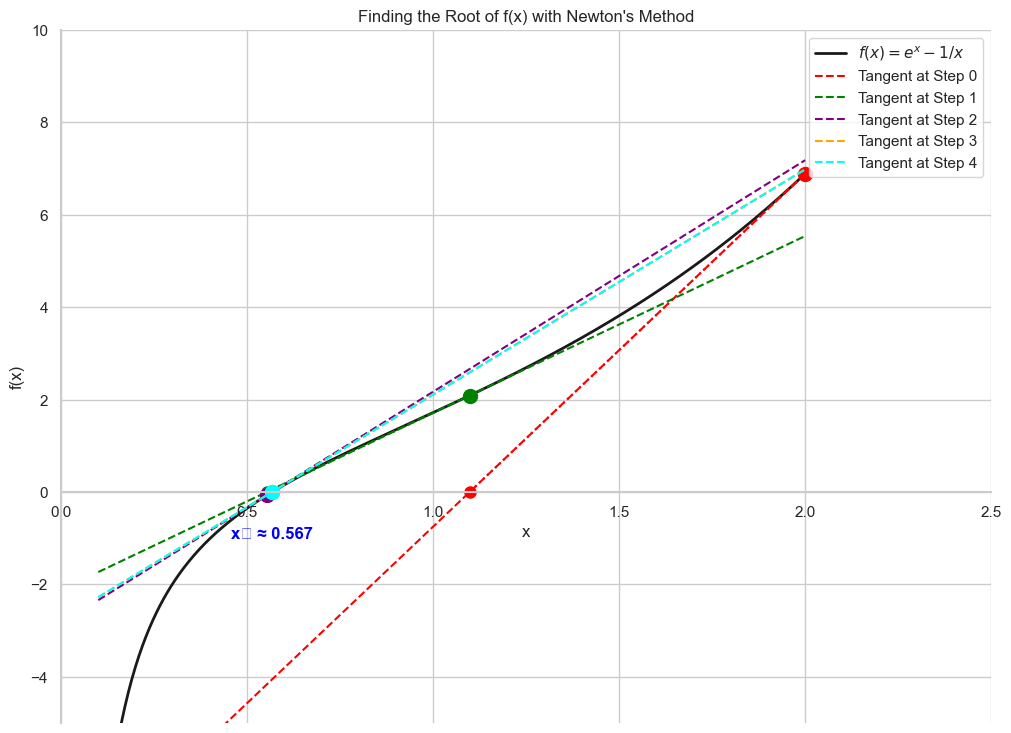

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define the function we want to find the root of (the derivative of the original cost function) ---
def f(x):
    return np.exp(x) - (1/x)

def f_prime(x):
    return np.exp(x) + (1/x**2)

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 9))
x_vals = np.linspace(0.1, 2, 400)
y_vals = f(x_vals)
ax.plot(x_vals, y_vals, 'k-', linewidth=2, label="$f(x) = e^x - 1/x$")

# --- Perform Newton's method iterations ---
x_n = 2.0 # Starting point
tangent_colors = ['red', 'green', 'purple', 'orange', 'cyan']

for i in range(5):
    f_xn = f(x_n)
    f_prime_xn = f_prime(x_n)
    
    # Plot the current point and tangent line
    ax.plot(x_n, f_xn, 'o', color=tangent_colors[i], markersize=10)
    tangent = f_prime_xn * (x_vals - x_n) + f_xn
    ax.plot(x_vals, tangent, '--', color=tangent_colors[i], label=f'Tangent at Step {i}')
    
    # Calculate the next point
    x_n_plus_1 = x_n - f_xn / f_prime_xn
    
    # Plot the line to the x-axis
    ax.plot([x_n, x_n_plus_1], [f_xn, 0], ':', color=tangent_colors[i])
    ax.plot(x_n_plus_1, 0, 'o', color=tangent_colors[i], markersize=8)
    
    x_n = x_n_plus_1

# --- Format the plot ---
ax.set_title("Finding the Root of f(x) with Newton's Method")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)

# Set the axis lines to be bold
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(-5, 10)
ax.set_xlim(0, 2.5)

# Highlight the final approximation
ax.text(x_n, -1, f'x₅ ≈ {x_n:.3f}', ha='center', color='blue', fontweight='bold')


plt.show()

---

## Analyzing the Convergence

As the plot shows, Newton's method converges to the solution with incredible speed.

* **x₀ = 2.0**
* **x₁ ≈ 0.97**
* **x₂ ≈ 0.63**
* **x₃ ≈ 0.570**
* **x₄ ≈ 0.567**

In only a few iterations, we have arrived at an excellent approximation of the true minimum (`x ≈ 0.567`), which is known as the Omega constant. This demonstrates the power and speed of Newton's method. Just like with Gradient Descent, we found the minimum without ever needing to solve the difficult equation $e^x - 1/x = 0$ analytically.